# Tool Criticism in Digital Humanities Research

## Sentiment Analysis for Social Media Texts

This notebook provides some insights in how sentiment analysis struggles with different types of texts, and points to some potential pitfalls and things to take into account, to develop intuitions for when and how to use it, and what questions to ask yourself when incorporating it in your research processes.

We look at in two types of social media texts:

- **Amazon book reviews**: Two sets of 10,000 reviews each (taken from the excellent [Amazon Review Data](https://nijianmo.github.io/amazon/index.html) site). We are interested in comparing sets of books reviews to get insight into how books affect readers and how, for instance, the introduction of a TV or Film adaptation influences this.

- **Tweets**: a rather arbitrary set of very old tweets, taken from a much larger [collection of tweets available on Kaggle](https://www.kaggle.com/kazanova/sentiment140).

We start with a set of user reviews of the book *The Handmaid's Tale* by Margaret Atwood. The dataset consists of 10,000 Amazon user reviews. 

The sentiment analysis tool we use is [VADER](https://github.com/cjhutto/vaderSentiment), which is incorporated in [NLTK](https://www.nltk.org).

### Question 1

These round numbers of reviews should trigger alarm bells that this is probably a selection from a larger set reviews, but is capped at 10,000 for convenience. What do you need to know about the selection process to understand what this dataset represents and what its limitations are?

### Question 2

What is the intended use of the VADER sentiment analyser? For what kind of data is it made to work well? Got to the [VADER](https://github.com/cjhutto/vaderSentiment) website and see what you can find out about its strengths and limitations. 

## Loading Libraries

In [1]:
# In case you haven't installed the modules below yet, uncomment and run the following line
#!pip install pandas requests nltk

import pandas as pd
import requests
import nltk

Download the VADER lexicon using NLTK's download function.

In [2]:
import nltk

nltk.download([
    "vader_lexicon",
])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/marijnkoolen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Alternatively, run this command below and use the graphical interface go to the `Models` tab, scroll down and select `vader_lexicon`, then click the `download` button


In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Loading the Datasets

Run this only if you haven't downloaded the datasets before.

In [4]:
datasets = [
    {
        'name': 'handmaid_reviews',
        'file': 'reviews-amazon-handmaids_tale.csv.gz', 
        'url': 'https://surfdrive.surf.nl/files/index.php/s/HQYhNS151OCcfco/download'
    },
    {
        'name': 'mixed_reviews',
        'file': 'reviews-amazon-100-books.csv.gz', 
        'url': 'https://surfdrive.surf.nl/files/index.php/s/V0R0E1lMRueVVkG/download'
    },
    {
        'name': 'kaggle-tweets',
        'file': 'kaggle_tweets-april.csv.gz', 
        'url': 'https://surfdrive.surf.nl/files/index.php/s/ne5Vmskf8f9yP6f/download'
    },
]

def download_datasets():
    for dataset in datasets:
        response = requests.get(dataset['url'])
        with open(dataset['file'], 'wb') as fh:
            fh.write(response.content)

download_datasets()

## Sentiment in User Reviews of The Handmaid's Tale

In [5]:
handmaid_reviews_file = 'reviews-amazon-handmaids_tale.csv.gz'

df = pd.read_csv(handmaid_reviews_file, compression='gzip', parse_dates=[3])
df = df[df.review_text.isna() == False]
df.head(5)

,asin,reviewer_name,vote,review_time,overall,reviewer_id,title,style,category,num_chars,review_lang,image,book_id,verified,review_text,summary,unixReviewTime,review_id
0,99740915,Amazon Customer,2,1996-12-25,5.0,AJVVATHEYX7L9,The Handmaid's Tale (Contemporary Classics),{'Format:': ' Paperback'},"['Books', 'Literature & Fiction', 'Contemporary']",701,en,NaN,99740915,False,I didn't know what to expect when I decided to...,The things that stick with you...,851472000,0099740915-AJVVATHEYX7L9
1,99740915,Jim,NaN,2018-05-02,4.0,A2O537TL23PMQF,The Handmaid's Tale (Contemporary Classics),{'Format:': ' Kindle Edition'},"['Books', 'Literature & Fiction', 'Contemporary']",107,en,NaN,99740915,False,Loved it! A well written novel can transport m...,Impressive,1525219200,0099740915-A2O537TL23PMQF
2,99740915,B. Wilfong,NaN,2018-05-02,4.0,A2ZATPER188K3J,The Handmaid's Tale (Contemporary Classics),{'Format:': ' Paperback'},"['Books', 'Literature & Fiction', 'Contemporary']",2067,en,NaN,99740915,False,"Obviously, The Handmaids Tale has been on my r...",Its lack of love we die from.,1525219200,0099740915-A2ZATPER188K3J
3,99740915,Vickie Woodard,NaN,2018-05-02,5.0,A196VEITY4SDJZ,The Handmaid's Tale (Contemporary Classics),{'Format:': ' Kindle Edition'},"['Books', 'Literature & Fiction', 'Contemporary']",345,en,NaN,99740915,False,It's inconceivable to me as an American that r...,",SCARY",1525219200,0099740915-A196VEITY4SDJZ
4,99740915,Corinne Bazella,NaN,2018-05-01,5.0,A1CQDKX2O0GVSY,The Handmaid's Tale (Contemporary Classics),{'Format:': ' Kindle Edition'},"['Books', 'Literature & Fiction', 'Contemporary']",149,en,NaN,99740915,False,Difficult to read in the times we are living i...,Scary,1525132800,0099740915-A1CQDKX2O0GVSY


### Sentiment Polarity and Intensity Per Review

We start with scoring each review as a whole on polarity and intensity.

In [6]:
# Load the VADER sentiment analyser built into NLTK
from nltk.sentiment import SentimentIntensityAnalyzer
# create an analyser object
sia = SentimentIntensityAnalyzer()

# compute polarity scores for each review once
polarity_scores = [sia.polarity_scores(review_text) for review_text in df.review_text]


In [7]:
# showing one example:
print(list(df.review_text)[0])
print(polarity_scores[0])


I didn't know what to expect when I decided to read this book, but I'd heard it was
an excellent read, so I decided to give it a try. And am I glad I did!
This is one of those books that stays with you forever!
 A few memorable items about the book:
 1) The constant references to the way a situation can  force
 a person to forget everything they ever were or believed. It's  an
 interesting study into the methods of mental adaptation in the human
 species.
 2) The way it's set up like an ancient oral tale that is eventually studied,
 picked apart, and made fun of in a long distant future. That chilling
 academic response to a woman's experiences is hard to forget.
 This is a must read!

 Adora
{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'compound': 0.9567}


Above you see the first review in the dataset and the scores assigned to it by the VADER sentiment intensity analyser, where the `neg` score represents the intensity of negative sentiment, `neu` that for neutral sentiment, `pos` for positive sentiment.

The `compound` score is a weighted average ('normalized, weighted composite score' according to its creator) that can range from -1 to 1 with 0 being neutral, -1 being clearly negative and 1 being clearly positive.

### Question 3

Are the four scores a good reflection of the review's overall sentiment in your view? How would you score the sentiment in this review?


Next, we add all the polarity scores to the data frame and do a quantitative analysis. Since the reviews have ratings (the `overall` column), we can compare the polarity scores against the ratings.

The rating systems goes from 1 to 5 stars, where higher ratings correspond to more positive reviews.

### Question 4

Which of the four scores do you expect to be the best reflection of the rating? Or do you think that the rating and the sentiment scores have no relationship? If so, why do you expect that?

In [8]:
# Add each type of score as a column to the data frame
df['neg'] = [round(score['neg'],1) for score in polarity_scores]
df['neu'] = [round(score['neu'],1) for score in polarity_scores]
df['pos'] = [round(score['pos'],1) for score in polarity_scores]
df['compound'] = [round(score['compound'],1) for score in polarity_scores]

df.head(5)

,asin,reviewer_name,vote,review_time,overall,reviewer_id,title,style,category,num_chars,...,book_id,verified,review_text,summary,unixReviewTime,review_id,neg,neu,pos,compound
0,99740915,Amazon Customer,2,1996-12-25,5.0,AJVVATHEYX7L9,The Handmaid's Tale (Contemporary Classics),{'Format:': ' Paperback'},"['Books', 'Literature & Fiction', 'Contemporary']",701,...,99740915,False,I didn't know what to expect when I decided to...,The things that stick with you...,851472000,0099740915-AJVVATHEYX7L9,0.1,0.8,0.2,1.0
1,99740915,Jim,NaN,2018-05-02,4.0,A2O537TL23PMQF,The Handmaid's Tale (Contemporary Classics),{'Format:': ' Kindle Edition'},"['Books', 'Literature & Fiction', 'Contemporary']",107,...,99740915,False,Loved it! A well written novel can transport m...,Impressive,1525219200,0099740915-A2O537TL23PMQF,0.0,0.6,0.4,0.8
2,99740915,B. Wilfong,NaN,2018-05-02,4.0,A2ZATPER188K3J,The Handmaid's Tale (Contemporary Classics),{'Format:': ' Paperback'},"['Books', 'Literature & Fiction', 'Contemporary']",2067,...,99740915,False,"Obviously, The Handmaids Tale has been on my r...",Its lack of love we die from.,1525219200,0099740915-A2ZATPER188K3J,0.1,0.8,0.1,0.9
3,99740915,Vickie Woodard,NaN,2018-05-02,5.0,A196VEITY4SDJZ,The Handmaid's Tale (Contemporary Classics),{'Format:': ' Kindle Edition'},"['Books', 'Literature & Fiction', 'Contemporary']",345,...,99740915,False,It's inconceivable to me as an American that r...,",SCARY",1525219200,0099740915-A196VEITY4SDJZ,0.1,0.8,0.1,-0.6
4,99740915,Corinne Bazella,NaN,2018-05-01,5.0,A1CQDKX2O0GVSY,The Handmaid's Tale (Contemporary Classics),{'Format:': ' Kindle Edition'},"['Books', 'Literature & Fiction', 'Contemporary']",149,...,99740915,False,Difficult to read in the times we are living i...,Scary,1525132800,0099740915-A1CQDKX2O0GVSY,0.1,0.9,0.0,-0.6


### Overall rating and Negative sentiment intensity

<AxesSubplot:xlabel='neg'>

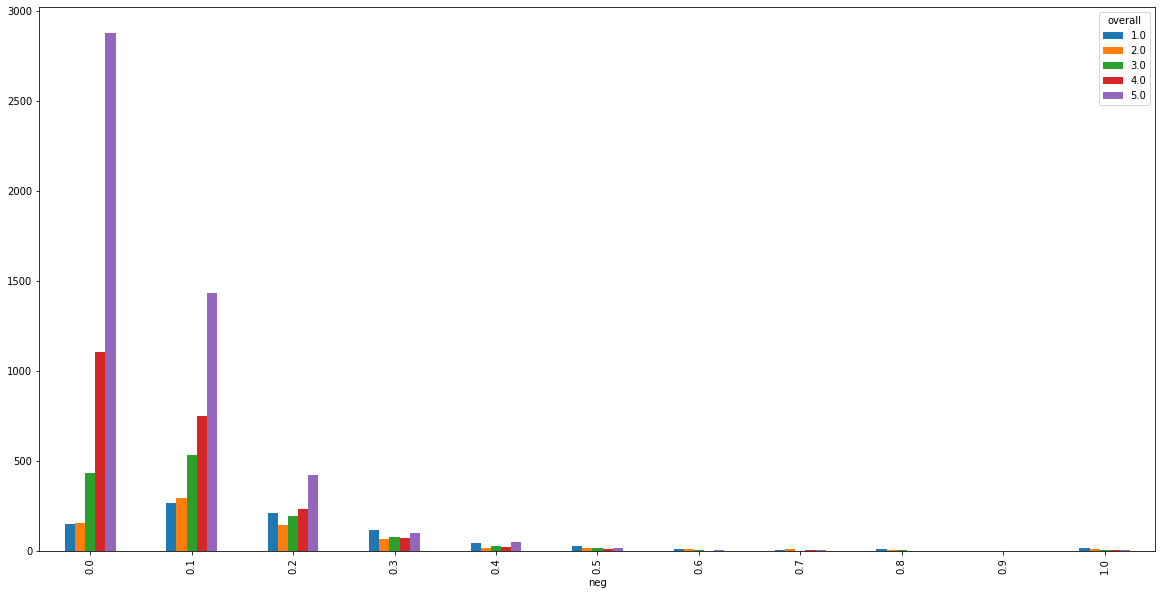

In [9]:
# Looking at the relation between overall rating and negative sentiment intensity
g = df.groupby(['neg', 'overall']).size()
g.unstack('overall').plot(kind='bar', figsize=(20, 10))

### Overall rating and Neutral sentiment intensity

<AxesSubplot:xlabel='neu'>

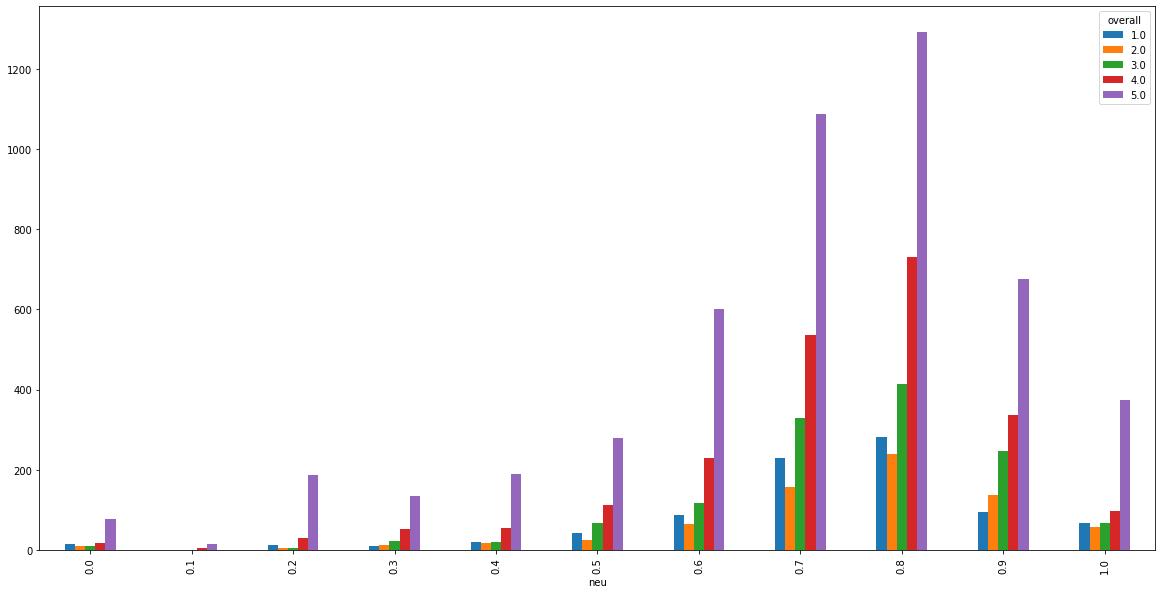

In [10]:
# Looking at the relation between overall rating and neutral sentiment intensity
g = df.groupby(['neu', 'overall']).size()
g.unstack('overall').plot(kind='bar', figsize=(20, 10))

### Overall rating and Positive sentiment intensity

<AxesSubplot:xlabel='pos'>

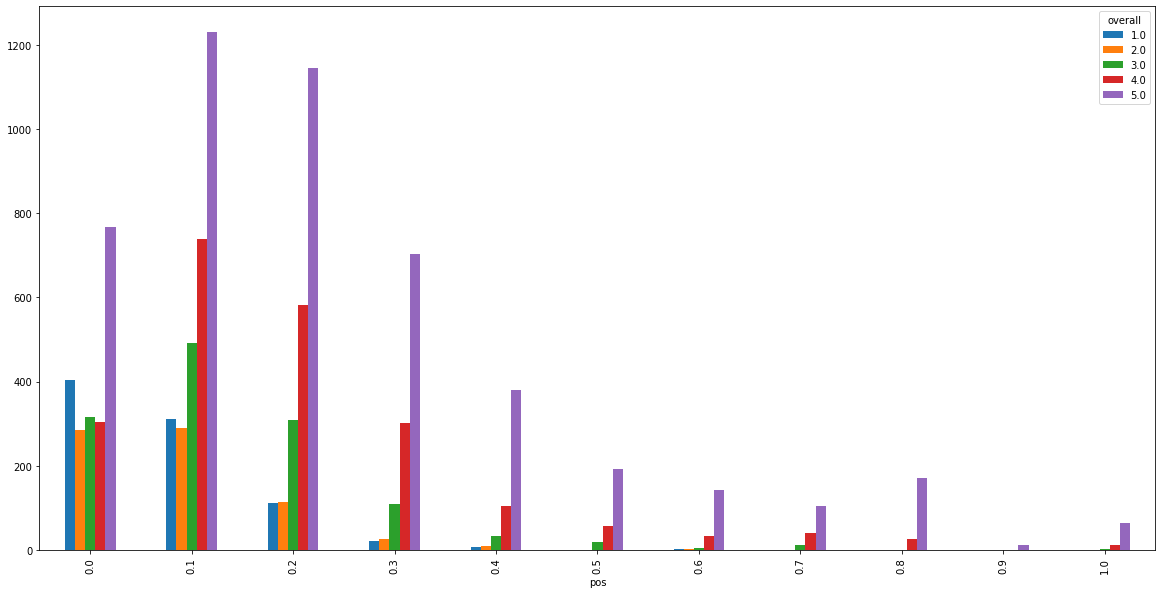

In [11]:
# Looking at the relation between overall rating and positive sentiment intensity
g = df.groupby(['pos', 'overall']).size()
g.unstack('overall').plot(kind='bar', figsize=(20, 10))

### Overall rating and Compound sentiment intensity

<AxesSubplot:xlabel='compound'>

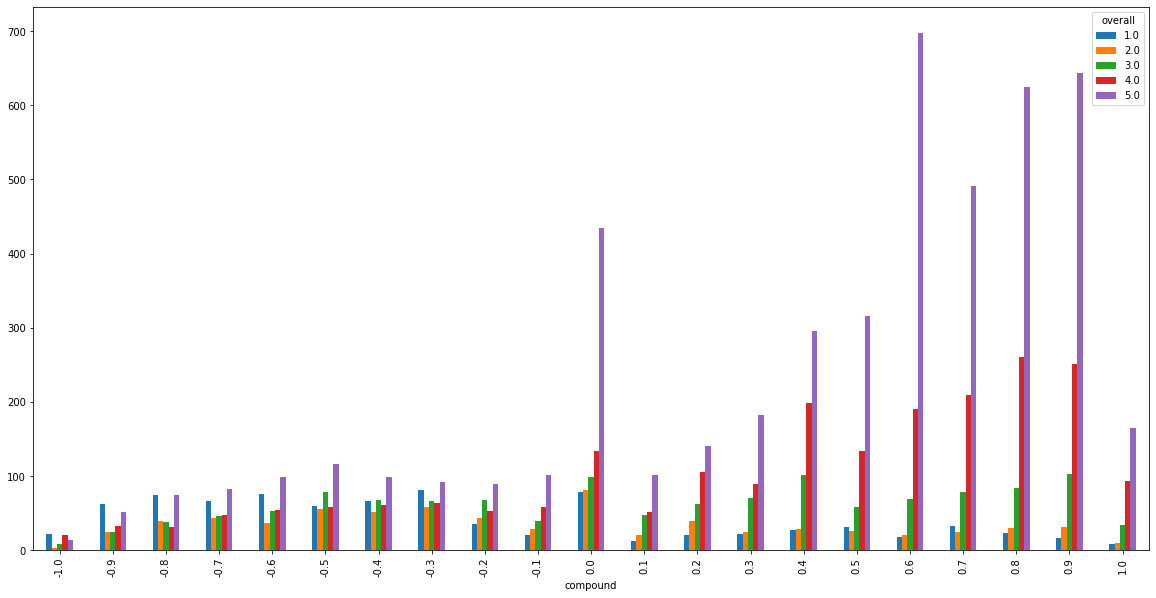

In [12]:
g = df.groupby(['compound', 'overall']).size()
g.unstack('overall').plot(kind='bar', figsize=(20, 10))

### Question 5

What does the plot with the compounded intensity score distribution per rating level tell you? If the score for a review is slightly negative, what is the most likely rating?

In [14]:
df[df.compound == -0.4].overall.value_counts()

5.0    99
3.0    68
1.0    67
4.0    61
2.0    52
Name: overall, dtype: int64

## Sentiment per Sentence

VADER is optimized for evaluating sentiment in short social media texts. With longer reviews, some recommend to score sentiment per sentence, and aggregate the scores. 

In [15]:
from nltk.tokenize import sent_tokenize

sample_reviews = list(df.review_text)[:10]

data = {'sent': [], 'neg': [], 'neu': [], 'pos': [], 'comp': []}

for review in sample_reviews:
    sents = sent_tokenize(review.replace('\n', ' '))
    for sent in sents:
        scores = sia.polarity_scores(sent)
        data['sent'].append(sent)
        data['neg'].append(scores['neg'])
        data['neu'].append(scores['neu'])
        data['pos'].append(scores['pos'])
        data['comp'].append(scores['compound'])
    
sent_df = pd.DataFrame(data)
pd.set_option('display.max_colwidth', None)
sent_df

,sent,neg,neu,pos,comp
0,"I didn't know what to expect when I decided to read this book, but I'd heard it was an excellent read, so I decided to give it a try.",0.000,0.826,0.174,0.7227
1,And am I glad I did!,0.000,0.477,0.523,0.5093
2,This is one of those books that stays with you forever!,0.000,1.000,0.000,0.0000
3,A few memorable items about the book: 1) The constant references to the way a situation can force a person to forget everything they ever were or believed.,0.073,0.927,0.000,-0.2263
4,It's an interesting study into the methods of mental adaptation in the human species.,0.000,0.828,0.172,0.4019
5,"2) The way it's set up like an ancient oral tale that is eventually studied, picked apart, and made fun of in a long distant future.",0.000,0.799,0.201,0.7003
6,That chilling academic response to a woman's experiences is hard to forget.,0.355,0.645,0.000,-0.3400
7,This is a must read!,0.000,1.000,0.000,0.0000
8,Adora,0.000,1.000,0.000,0.0000
9,Loved it!,0.000,0.193,0.807,0.6360


In [16]:
# reset the column width display so next steps show a normal table again
pd.set_option('display.max_colwidth', 40)

### Question 6

Look at the sentiment scores per sentence above. How well do the scores reflect the emotional valence of the sentences? How would you characterise the kinds of mistakes that the analyser makes? How would you characterise the kinds things the analyser does well?

### Question 7

How would you combine the sentiment scores per sentence into an overall score for an entire review? What are possible ways to come to meaningful scores?

## Sentiment in Tweets

Next, we look at using VADER on a set of tweets from April 2009. 

First, we load the data in a data frame and look at the first few rows to get an idea of what the data looks like.

In [17]:
tweet_file = 'kaggle_tweets-april.csv.gz'
df = pd.read_csv(tweet_file, compression='gzip', parse_dates=[3])
df.head(5)



,sentiment_score,tweet_id,timestamp,flag,username,text,date
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,@switchfoot http://twitpic.com/2y1zl...,2009-04-06
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Fa...,2009-04-06
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the...,2009-04-06
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like i...,2009-04-06
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behavi...",2009-04-06


The Kaggle Tweet dataset already comes with its own sentiment score, but we'll ignore these for now. 

As a next step, we use VADER to add the four types of sentiment intensity scores for each tweet.

In [18]:
# compute polarity scores for each review once
polarity_scores = [sia.polarity_scores(text) for text in df.text]

# Add each type of score as a column to the data frame
df['neg'] = [round(score['neg'],1) for score in polarity_scores]
df['neu'] = [round(score['neu'],1) for score in polarity_scores]
df['pos'] = [round(score['pos'],1) for score in polarity_scores]
df['compound'] = [round(score['compound'],1) for score in polarity_scores]

df.head(5)

,sentiment_score,tweet_id,timestamp,flag,username,text,date,neg,neu,pos,compound
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,@switchfoot http://twitpic.com/2y1zl...,2009-04-06,0.1,0.7,0.1,-0.0
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Fa...,2009-04-06,0.3,0.7,0.0,-0.8
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the...,2009-04-06,0.0,0.8,0.2,0.5
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like i...,2009-04-06,0.3,0.5,0.2,-0.2
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behavi...",2009-04-06,0.2,0.8,0.0,-0.7


Below, a random sample of 20 tweets is shown together with the VADER scores.

In [19]:
pd.set_option('display.max_colwidth', None)
df[['text', 'neg', 'neu', 'pos', 'compound']].sample(20)

,text,neg,neu,pos,compound
23522,anyone want to help me pick some movies for Netflix movie night? http://tinyurl.com/cdghqp make me happy,0.0,0.6,0.4,0.8
3963,is a single lady,0.0,1.0,0.0,0.0
38699,im so fat wanna loose wait i wanna be 100 lb,0.2,0.8,0.0,-0.4
9060,"There's no wifi where we are at, so I will be without internets until Monday night, no BEDA posts either",0.2,0.8,0.0,-0.5
97278,one more explanation of a quote and guess whose coursework is done,0.0,1.0,0.0,0.0
65673,@KimSherrell funniest thing I've read all day. thanks,0.0,0.5,0.5,0.8
80917,myspace is boring. entertain me,0.3,0.4,0.3,0.0
82936,@IvanCampuzano You ROCK Ivan! Good listener = Priceless,0.0,0.7,0.3,0.5
79028,Off to brunch with friends!,0.0,0.5,0.5,0.5
50551,@problogger I was born in 1969,0.0,1.0,0.0,0.0


Look at the tweets and VADER scores. Many of the tweets might be hard to interpret without any further context, but see if you can discern any sentiment in them. 

### Question 8

As before, assess the four types of scores? Which type best reflects the sentiment in your view? Are there notable differences between VADER's performance on tweets and on reviews?

### Quantitative analysis of sentiment scores

Now we compare the VADER scores against the pre-computed sentiment scores, assigned using the Sentiment140 algorithm, more details in the [Sentiment140 for students](http://help.sentiment140.com/for-students/) page and the research paper [Twitter Sentiment Classification using Distant Supervision](https://cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf). 

The Sentiment140 classifier assigns each tweet to one of three classes: `0` for negative sentiment, `2` for neutral, and `4` for positive sentiment. In the April dataset, only negative and positive scores occur:

In [20]:
df.sentiment_score.value_counts()

4    58418
0    41607
Name: sentiment_score, dtype: int64

If we plot a bar graph of the `sentiment_score` over the distribution of VADER `compound` scores, we get an insight in the extent to which they agree.

<AxesSubplot:xlabel='compound'>

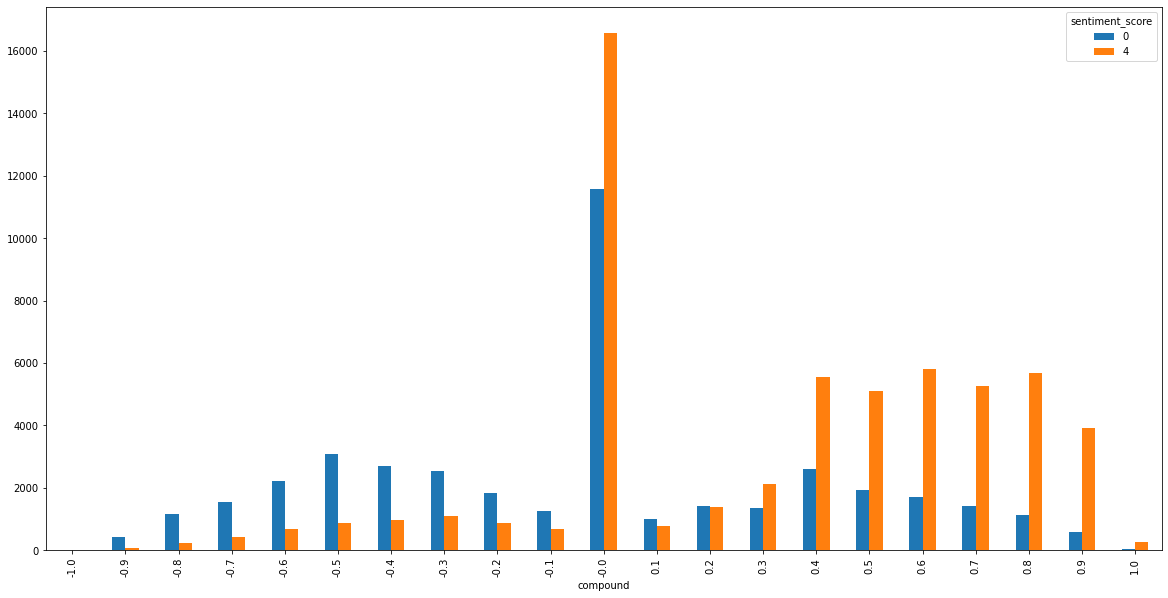

In [21]:
g = df.groupby(['sentiment_score', 'compound']).size()
g.unstack('sentiment_score').plot(kind='bar', figsize=(20, 10))

### Question 9

What is your impression of their agreement? And of VADER's performance on tweets and reviews in general?

## Further investigation

*Note*: For slightly more discussion of do's and don'ts, look at this short tutorial: [Using NLTKs Pre-Trained Sentiment Analyser](https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer
).

It is also insightful to look at:

- The [VADER lexicon](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt)
- the code of the [SentimentIntensityAnalyzer](https://www.nltk.org/_modules/nltk/sentiment/vader.html) class that is implemented in NLTK

